In [62]:
import sys
import os
import numpy as np
from astropy.table import Table

from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
sys.path.append('/Users/bostroem/Desktop/research/not_my_code/sndavis')
import alicesql

dhcp43238.physics.ucdavis.edu
/Users/bostroem/Desktop/research/not_my_code/sndavis/


In [61]:
sys.path.append('../code/')
from alice_light_curve_analysis import calc_absmag
import define_filters

In [4]:
FIG_DIR = '../figures'

In [5]:
similar_sn = ['2015W', '2013ej', 'asassn14kg', '2013fs', '2016zb', '2013ai', 
              '1987A', 'asassn14gm', '2013ab', '1992am']

In [6]:
asassn15oz = alicesql.getobjectinfo('asassn15oz')

no object


In [7]:
asassn15oz.keys()

['magerr',
 'ebvg',
 'jdexpl',
 'names',
 'muerr',
 'ebvierr',
 'datatype',
 'bands',
 'jdexplerr',
 'targetid',
 'mu',
 'source',
 'ebvgerr',
 'mag',
 'sntype',
 'jd',
 'dec',
 'ebvi',
 'ra']

In [8]:
band='V'
absmag15oz, stat_err15oz, sys_err15oz = calc_absmag(np.array(asassn15oz['mag'][band]), asassn15oz['mu'], 
                                                    'V', np.array(asassn15oz['magerr'][band]), asassn15oz['muerr'], band, 
                                                    A_gal=3.1*asassn15oz['ebvg'], A_gal_err=3.1*asassn15oz['ebvgerr'], 
                                                    A_host=3.1*asassn15oz['ebvi'], A_host_err=3.1*asassn15oz['ebvierr'], 
                                                    Rv=3.1, Rb=4.1)

(-9.8395549549605974, -18.580374954960597)

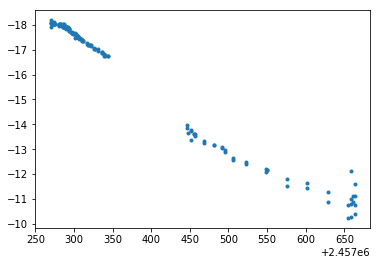

In [9]:
pyplot.plot(asassn15oz['jd']['V'], absmag15oz, 'o')
ax = pyplot.gca()
ax.set_ylim(ax.get_ylim()[::-1])

In [80]:
filters = define_filters.define_filters()
filter_tbdata = Table(names=['band', 'cenwave'], dtype=['S5', 'f8'])
for ifilter in filters.keys():
    new_row = [ifilter, filters[ifilter][2]]
    filter_tbdata.add_row(new_row)
filter_tbdata.sort(['cenwave'])
tbdata

band,cenwave
str5,float64
uw2,2136.7
S,2136.7
D,2269.2
um2,2269.2
uw1,2650.6
A,2650.6
us,3442.6
u,3561.8
U,3652.0


# Stefano's Favorite Objects

no object
no object
no object
no object
no object
no object
no object


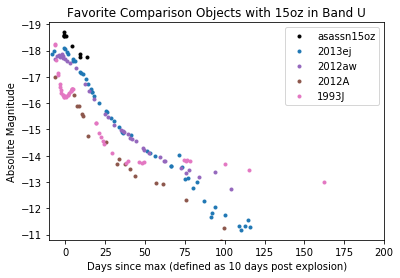

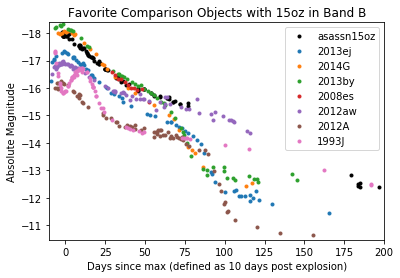

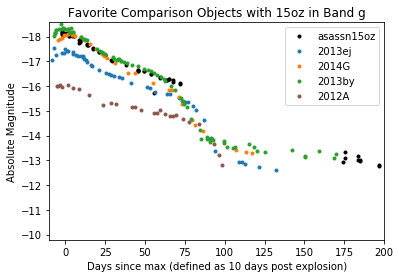

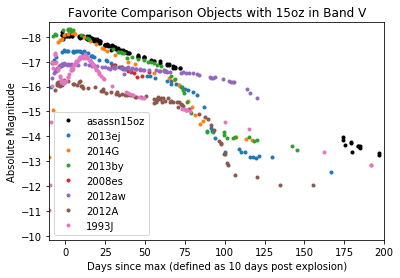

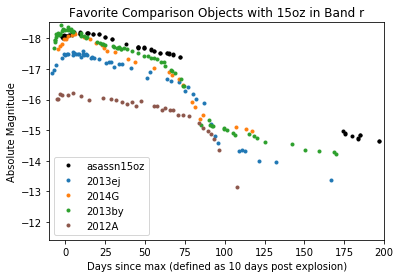

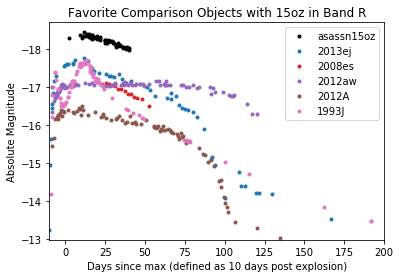

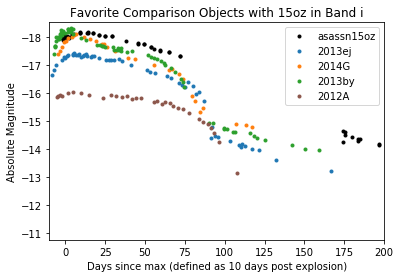

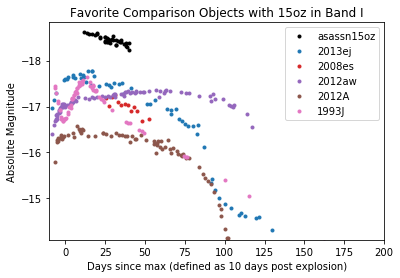

In [82]:
similar_sn = ['2013ej', '2014G', '2013by', '2008es', '2012aw', '2012A', '1993J']
prop_cycle = pyplot.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_plots = len(asassn15oz['jd'].keys())
fig_list = []
ax_list = []
for i in np.arange(1, num_plots+1):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    fig_list.append(fig)
    ax_list.append(ax)
    
ax_num=0
for band in filter_tbdata['band']:
    if band in asassn15oz['jd'].keys():
        
        absmag15oz, stat_err15oz, sys_err15oz = calc_absmag(np.array(asassn15oz['mag'][band]), asassn15oz['mu'], 
                                                    'V', np.array(asassn15oz['magerr'][band]), asassn15oz['muerr'], band, 
                                                    A_gal=3.1*asassn15oz['ebvg'], A_gal_err=3.1*asassn15oz['ebvgerr'], 
                                                    A_host=3.1*asassn15oz['ebvi'], A_host_err=3.1*asassn15oz['ebvierr'], 
                                                    Rv=3.1, Rb=4.1)
        ax_list[ax_num].plot(asassn15oz['jd'][band]-(asassn15oz['jdexpl']+10), absmag15oz, 'ko', label='asassn15oz')
        ax_num+=1
        
for c, sn in zip(colors, similar_sn):
    ax_num=0
    sndata = alicesql.getobjectinfo(sn)
    max_day = sndata['jdexpl']+10
    for band in tbdata['band']:
        if (band in asassn15oz['jd'].keys()):
            if (band in sndata['jd'].keys()):
                absmag, stat_err, sys_err = calc_absmag(np.array(sndata['mag'][band]), sndata['mu'], 
                                                        'V', np.array(sndata['magerr'][band]), sndata['muerr'], band, 
                                                        A_gal=3.1*sndata['ebvg'], A_gal_err=3.1*sndata['ebvgerr'], 
                                                        A_host=3.1*sndata['ebvi'], A_host_err=3.1*sndata['ebvierr'], 
                                                        Rv=3.1, Rb=4.1)
                ax = ax_list[ax_num]
                ax.plot(sndata['jd'][band]-max_day, absmag, 'o', label=sn, color=c)
                ax.set_xlim(-10, 200)
                ylim = ax.get_ylim()
                if ylim[0] < ylim[1]:
                    ax.set_ylim(ylim[::-1])
                ax.legend(loc='best')
                ax.set_title('Favorite Comparison Objects with 15oz in Band {}'.format(band))
                ax.set_xlabel('Days since max (defined as 10 days post explosion)')
                ax.set_ylabel('Absolute Magnitude')
            ax_num +=1
pp = PdfPages(os.path.join(FIG_DIR, 'lc_comp_fav_obj.pdf'))
for fig in fig_list:
    fig.savefig(pp, format='pdf')
pp.close()

# Best Chi Square Fit

no object
no object
no object
no object
no object
no object


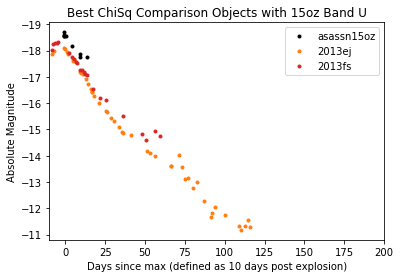

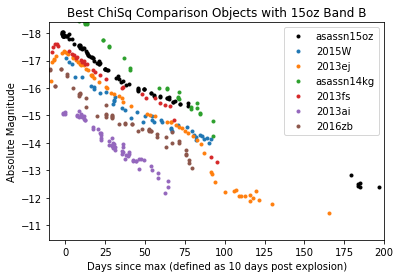

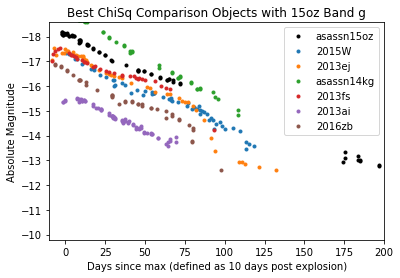

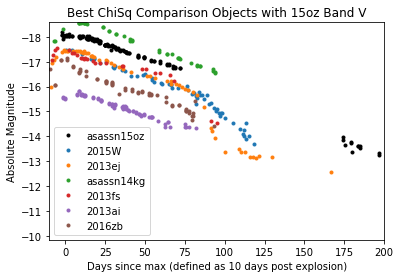

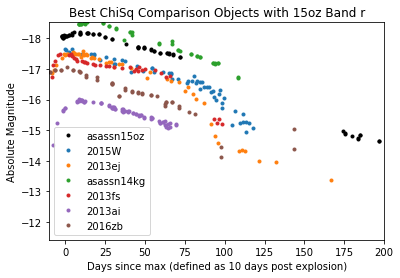

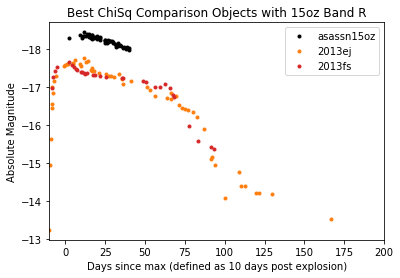

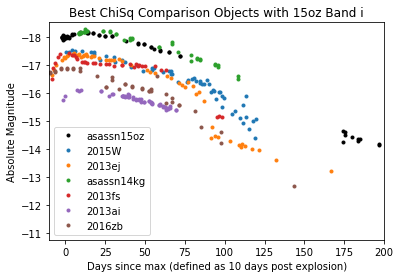

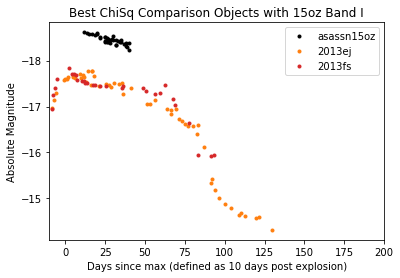

In [83]:
similar_sn = similar_sn = ['2015W', '2013ej', 'asassn14kg', '2013fs',  '2013ai', '2016zb'] 

prop_cycle = pyplot.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_plots = len(asassn15oz['jd'].keys())
fig_list = []
ax_list = []
for i in np.arange(1, num_plots+1):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    fig_list.append(fig)
    ax_list.append(ax)
    
ax_num=0
for band in filter_tbdata['band']:
    if band in asassn15oz['jd'].keys():
        
        absmag15oz, stat_err15oz, sys_err15oz = calc_absmag(np.array(asassn15oz['mag'][band]), asassn15oz['mu'], 
                                                    'V', np.array(asassn15oz['magerr'][band]), asassn15oz['muerr'], band, 
                                                    A_gal=3.1*asassn15oz['ebvg'], A_gal_err=3.1*asassn15oz['ebvgerr'], 
                                                    A_host=3.1*asassn15oz['ebvi'], A_host_err=3.1*asassn15oz['ebvierr'], 
                                                    Rv=3.1, Rb=4.1)
        ax_list[ax_num].plot(asassn15oz['jd'][band]-(asassn15oz['jdexpl']+10), absmag15oz, 'ko', label='asassn15oz')
        ax_num+=1
        
for c, sn in zip(colors, similar_sn):
    ax_num=0
    sndata = alicesql.getobjectinfo(sn)
    max_day = sndata['jdexpl']+10
    for band in filter_tbdata['band']:
        if (band in asassn15oz['jd'].keys()):
            if (band in sndata['jd'].keys()):
                absmag, stat_err, sys_err = calc_absmag(np.array(sndata['mag'][band]), sndata['mu'], 
                                                        'V', np.array(sndata['magerr'][band]), sndata['muerr'], band, 
                                                        A_gal=3.1*sndata['ebvg'], A_gal_err=3.1*sndata['ebvgerr'], 
                                                        A_host=3.1*sndata['ebvi'], A_host_err=3.1*sndata['ebvierr'], 
                                                        Rv=3.1, Rb=4.1)
                ax = ax_list[ax_num]
                ax.plot(sndata['jd'][band]-max_day, absmag, 'o', label=sn, color=c)
                ax.set_xlim(-10, 200)
                ylim = ax.get_ylim()
                if ylim[0] < ylim[1]:
                    ax.set_ylim(ylim[::-1])
                ax.legend(loc='best')
                ax.set_title('Best ChiSq Comparison Objects with 15oz Band {}'.format(band))
                ax.set_xlabel('Days since max (defined as 10 days post explosion)')
                ax.set_ylabel('Absolute Magnitude')
            ax_num +=1
pp = PdfPages(os.path.join(FIG_DIR, 'lc_comp_best_chi_obj.pdf'))
for fig in fig_list:
    fig.savefig(pp, format='pdf')
pp.close()
            

In [42]:
sndata = alicesql.getobjectinfo('2016zb')
print(sndata['mag']['V'])
absmag, stat_err, sys_err = calc_absmag(np.array(sndata['mag'][band]), sndata['mu'], 
                                                    'V', np.array(sndata['magerr'][band]), sndata['muerr'], band, 
                                                    A_gal=3.1*sndata['ebvg'], A_gal_err=3.1*sndata['ebvgerr'], 
                                                    A_host=3.1*sndata['ebvi'], A_host_err=3.1*sndata['ebvierr'], 
                                                    Rv=3.1, Rb=4.1)
print(sndata['muerr'])
#print(absmag)

no object
[ 17.2006  17.8552  17.8638  16.8668  16.8568  16.7599  16.8379  17.1295
  17.1101  17.3215  17.366   17.2849  17.2056  17.4828  17.2883  17.6244
  17.6236  17.7054  17.7344  17.6868  17.7575  17.7968  17.7364  17.8539
  17.7904  18.235   17.9946  18.0532  18.0974  18.0235  18.1289  18.1729
  18.0976  18.1226  18.1934  18.2529  18.2141  18.239   18.2702  18.5225
  18.3391  18.6668  18.698   18.647   18.6554  18.8885  18.8237  18.8966
  18.8646  18.9763  18.8942  19.0922  19.2657  19.0023  19.0894  18.5115
  19.5166]
0.02


In [46]:
fig = pyplot.figure()

In [54]:
prop_cycle = pyplot.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [60]:
len(colors)

10